
#内容
1.   対応のあるt検定
2.   一要因分散分析
3.   二要因分散分析



#参考


1.   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
2.   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
3.   https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html
4.   https://chemicalfactory.hatenablog.com/entry/2022/05/04/234408



# 準備

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns
import pandas as pd

#分散分析用
import statsmodels.api as sm
from statsmodels.formula.api import ols

# import statistics as sta

In [2]:
# 自作の丸め関数の定義
def round_it(x, sig=4):
    return round(x, sig - int(math.floor(math.log10(abs(x)))) - 1)

#対応のあるのt検定

###### 対応とは、比較する二群の被験者が同一の場合のこと
対応なしは、被験者が違う場合
     A群とB群の分散が異なる場合は、また違ったt検点を行う。\
    しかし、対応ありの場合は、分散の偏りを考えなくてよい。\
    なぜなら、δ（条件１と条件２の差）で、計算を行うから。\
    差得点

##仮想データの作成

In [3]:
# 仮想データの作成
nums_1, mu_1, sigma_1 = 50, 60, 20 #mu は平均で、 sigma は標準偏差
sample_before = [random.normalvariate(mu_1, sigma_1) for _ in range(nums_1)]
nums_d, mu_d, sigma_d = 50, 10, 10 #mu は平均で、 sigma は標準偏差
delta = [random.normalvariate(mu_d, sigma_d) for _ in range(nums_d)]
sample_after = [x - y for x, y in zip(sample_before, delta)]

##データの概観

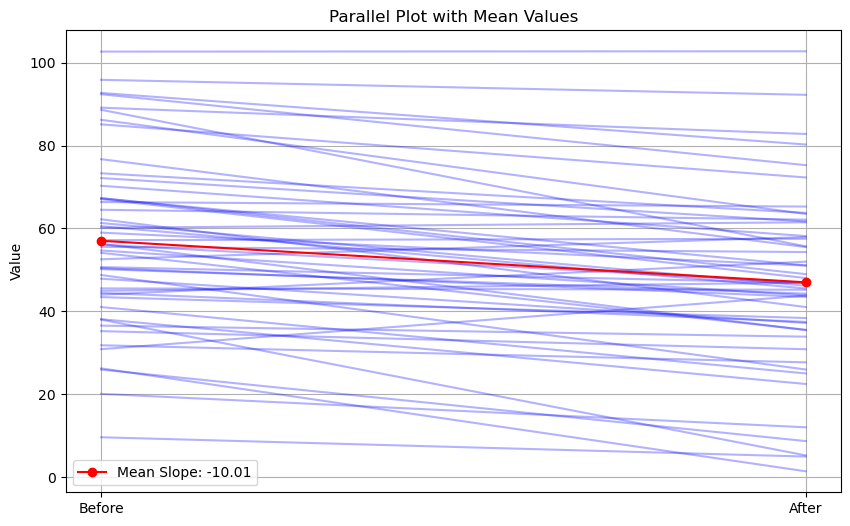

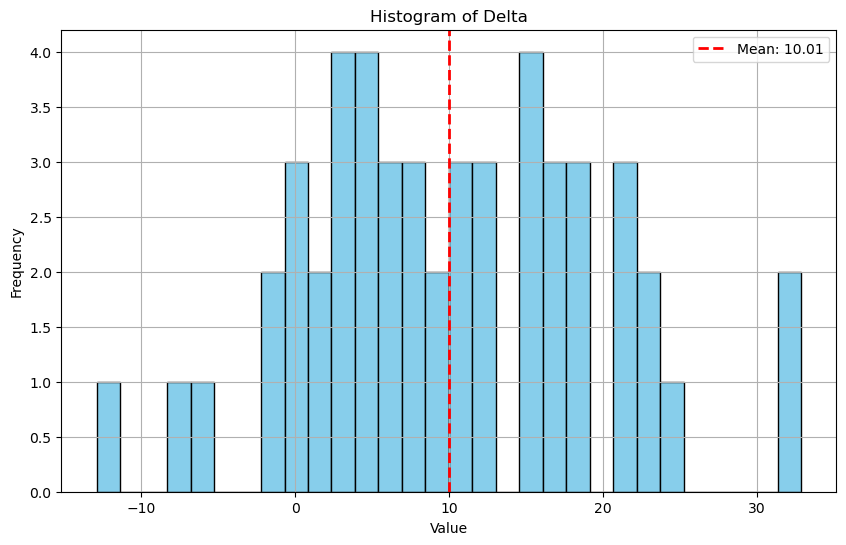

In [4]:
#データを概観
##平行プロット図の作成
# 平均値の計算
mean_before = np.mean(sample_before)
mean_after = np.mean(sample_after)

# 平行プロット図を作成し、平均値をプロット
plt.figure(figsize=(10, 6))
for i in range(len(sample_before)):
    plt.plot(['Before', 'After'], [sample_before[i], sample_after[i]], 'b-', alpha=0.3)

# 平均値をプロットし、線で結ぶ
plt.plot(['Before', 'After'], [mean_before, mean_after], 'r-o', label=f'Mean Slope: {mean_after - mean_before:.2f}')

# グラフの装飾
plt.title("Parallel Plot with Mean Values")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

##ヒストグラムの作成
target = delta
mean_delta = np.mean(delta)

plt.figure(figsize=(10, 6))
plt.hist(delta, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=np.mean(delta), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(delta):.2f}')
plt.title("Histogram of Delta")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()

##実行
定義式通りの計算は割愛＝関数での計算のみ

検定統計量t: 7.282, 自由度: 49, p値: 2.428e-09
95%信頼区間は 7.249 < 10.01 < 12.77


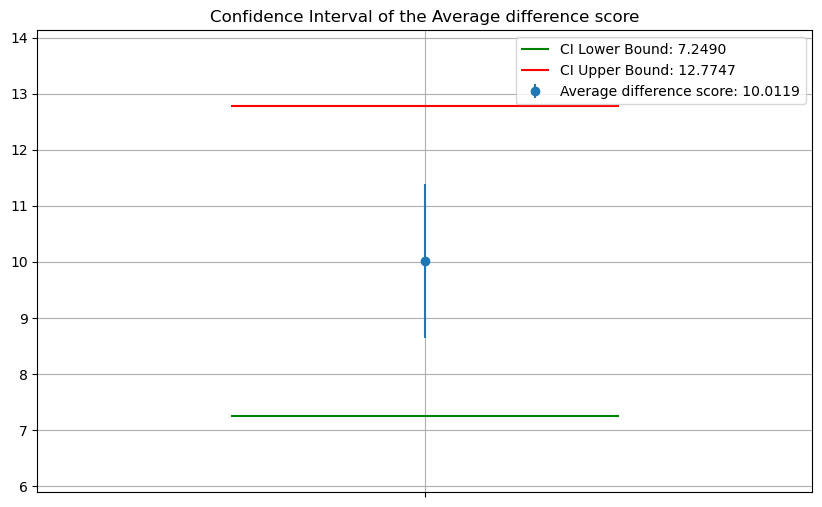

検定統計量t: 7.282, 自由度: 49, p値: 2.428e-09
95%信頼区間は 7.249 < 10.01 < 12.77


In [5]:
target_x = sample_before
target_y = sample_after

# paired t-test (RELATED)の実行
Result= stats.ttest_rel(target_x, target_y, axis=0,alternative='two-sided')#他の引数は基礎段階で割愛
CI = Result.confidence_interval(confidence_level=0.95)
# 結果を出力
print(f"検定統計量t: {Result.statistic:.4}, 自由度: {Result.df }, p値: {Result.pvalue:.4}")
print("95%信頼区間は",f"{CI.low:.4} < {(CI.high + CI.low) / 2:.4} < {CI.high:.4}")

# 図の作成
delta = [x - y for x, y in zip(target_x, target_y)]
target = delta
sample_mean = np.mean(target)
se_1 = stats.sem(target, axis=0, ddof=1)#自由度じゃなくて調整値を入れる

plt.figure(figsize=(10, 6))
plt.errorbar(1, sample_mean, yerr=se_1, fmt='o', label=f'Average difference score: {sample_mean:.4f}')
plt.hlines(y=CI.low, xmin=0.9, xmax=1.1, colors='green', label=f'CI Lower Bound: {CI.low:.4f}')
plt.hlines(y=CI.high, xmin=0.9, xmax=1.1, colors='red', label=f'CI Upper Bound: {CI.high:.4f}')
plt.xlim(0.8, 1.2)
plt.ylim(sample_mean - se_1 * 3, sample_mean + se_1 * 3)
plt.xticks([1], [''])
plt.title('Confidence Interval of the Average difference score')
plt.grid(True)
plt.legend()
plt.show()

# one-sample t-testでも確認 母平均は0
delta = [x - y for x, y in zip(target_x, target_y)]
target = delta
mu_test = 0
Result = stats.ttest_1samp(target, mu_test)
CI = Result.confidence_interval(confidence_level=0.95)
# 結果を出力
print(f"検定統計量t: {Result.statistic:.4}, 自由度: {Result.df }, p値: {Result.pvalue:.4}")
print("95%信頼区間は",f"{CI.low:.4} < {(CI.high + CI.low) / 2:.4} < {CI.high:.4}")

#一要因分散分析

##仮想データ作成と概観

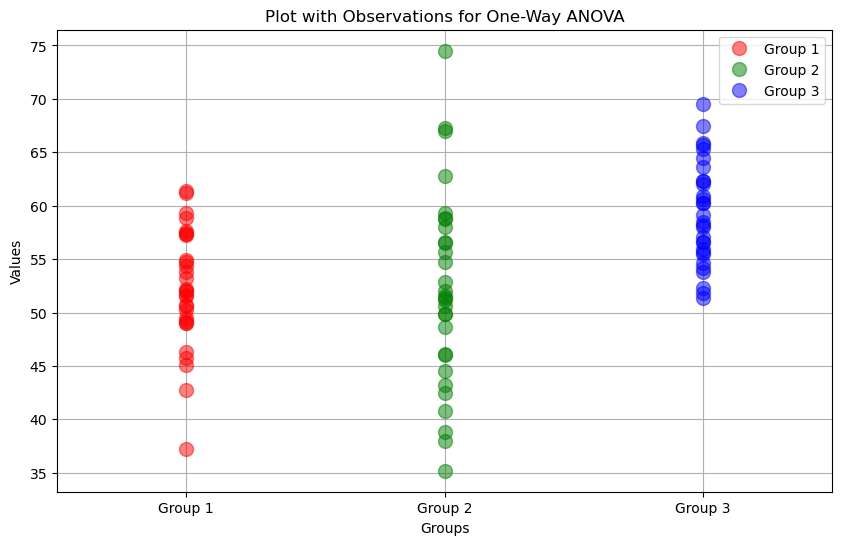

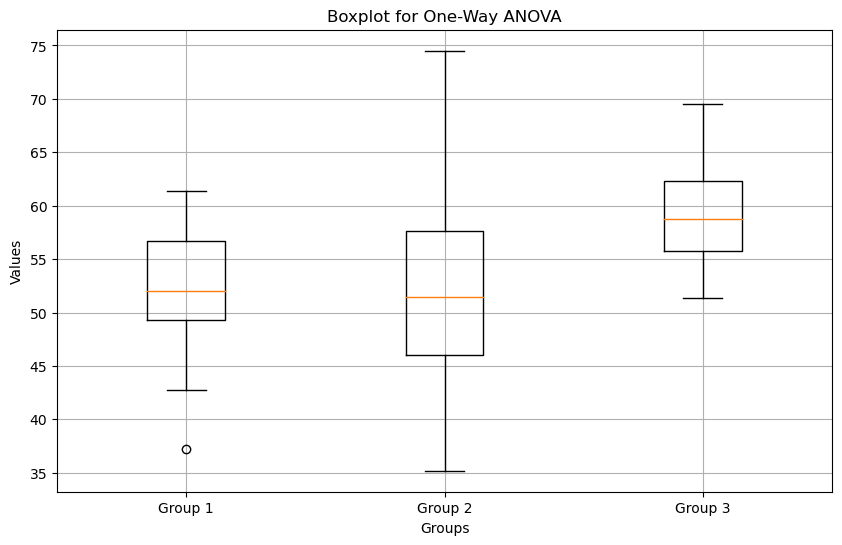

In [6]:
np.random.seed(0)
group1 = np.random.normal(loc=50, scale=5, size=30)
group2 = np.random.normal(loc=55, scale=10, size=30)
group3 = np.random.normal(loc=60, scale=5, size=30)

#まずはデータを概観

## プロット
plt.figure(figsize=(10, 6))
plt.plot(1 * np.ones(len(group1)), group1, 'r.', alpha=0.5, label='Group 1',markersize=20)
plt.plot(2 * np.ones(len(group2)), group2, 'g.', alpha=0.5, label='Group 2',markersize=20)
plt.plot(3 * np.ones(len(group3)), group3, 'b.', alpha=0.5, label='Group 3',markersize=20)
### タイトルとラベルの追加
plt.title('Plot with Observations for One-Way ANOVA')
plt.ylabel('Values')
plt.xlabel('Groups')
plt.xticks([1, 2, 3], ['Group 1', 'Group 2', 'Group 3'])  # X軸のラベルをグループ名に設定
plt.xlim(0.5,3.5)
plt.grid(True)
plt.legend()
plt.show()

## サンプルデータのboxプロット
plt.figure(figsize=(10, 6))
plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Boxplot for One-Way ANOVA')
plt.ylabel('Values')
plt.xlabel('Groups')
plt.grid(True)
plt.show()

##実行と分散分析表

In [7]:
# 一要因分散分析の実行
Result = stats.f_oneway(group1, group2, group3)
print(f"検定統計量f: {Result.statistic:.4}, p値: {Result.pvalue:.4}")

#最小二乗法（ols）を用いて分散分析モデルを構築して，分散分析実行と分散分析表の作成
##定義通りの計算は割愛。一般線形化モデルに帰着できる理由も割愛。

## pandasを用いてデータを整形(縦持ちと呼ばれる)
df_statsmodels = pd.DataFrame({
    'Value': np.concatenate([group1, group2, group3]),
    'Group': ['Group1'] * len(group1) + ['Group2'] * len(group2) + ['Group3'] * len(group3)
})

## OLSモデルを使って一要因分散分析
model = ols('Value ~ Group', data=df_statsmodels).fit()

## 分散分析表の生成
anova_table_statsmodels = sm.stats.anova_lm(model, typ=2)# Type 2 Anova DataFrame
anova_table_statsmodels

検定統計量f: 11.25, p値: 4.499e-05


,sum_sq,df,F,PR(>F)
Group,1028.892288,2.0,11.254235,0.000045
Residual,3976.886365,87.0,NaN,NaN


##結果の図化
本当はCIに多重性を加味する。
が，そうなると分散分析の結果の図化というより多重検定の結果の図化

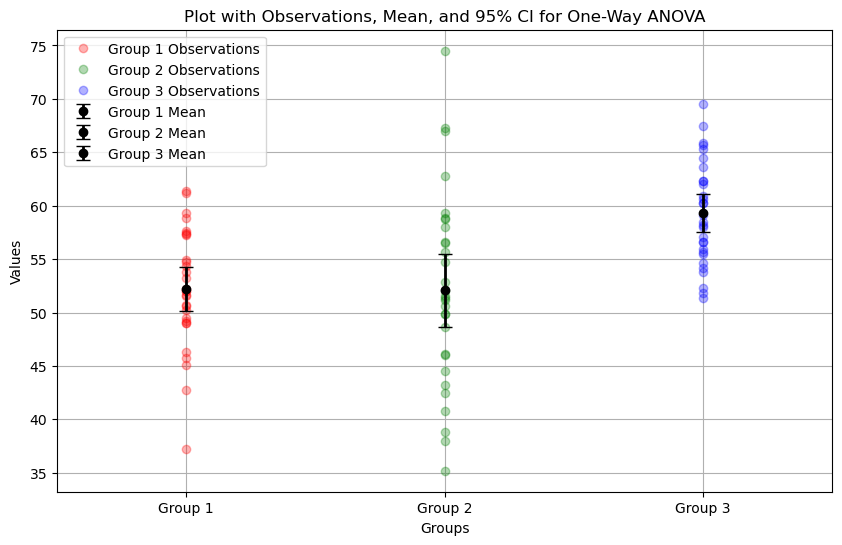

In [8]:
# def mean_confidence_interval(data, confidence=0.95):
#     """データの平均値と95％信頼区間を計算する関数"""
#     mean = np.mean(data)
#     sem = stats.sem(data)  # 標準誤差
#     margin = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)  # 信頼区間の幅
#     return mean, mean - margin, mean + margin

def mean_confidence_interval(data, confidence=0.95):
    """データの平均値と95％信頼区間を計算する関数"""
    mean = np.mean(data)
    Result = stats.ttest_1samp(data, mean)
    CI = Result.confidence_interval(confidence_level=confidence)  # 信頼区間の幅
    return mean, CI.low, CI.high

# 各グループの平均値と95%信頼区間の計算
mean1, ci_low1, ci_high1 = mean_confidence_interval(group1,confidence=0.95)
mean2, ci_low2, ci_high2 = mean_confidence_interval(group2,confidence=0.95)
mean3, ci_low3, ci_high3 = mean_confidence_interval(group3,confidence=0.95)

# 各グループの観測値のプロット
plt.figure(figsize=(10, 6))
plt.plot(np.ones(len(group1)) * 1, group1, 'ro', alpha=0.3, label='Group 1 Observations')
plt.plot(np.ones(len(group2)) * 2, group2, 'go', alpha=0.3, label='Group 2 Observations')
plt.plot(np.ones(len(group3)) * 3, group3, 'bo', alpha=0.3, label='Group 3 Observations')

# 平均値と95%信頼区間の追加
plt.errorbar(1, mean1, yerr=[[mean1 - ci_low1], [ci_high1 - mean1]], fmt='ko', lw=2, capsize=5, label='Group 1 Mean')
plt.errorbar(2, mean2, yerr=[[mean2 - ci_low2], [ci_high2 - mean2]], fmt='ko', lw=2, capsize=5, label='Group 2 Mean')
plt.errorbar(3, mean3, yerr=[[mean3 - ci_low3], [ci_high3 - mean3]], fmt='ko', lw=2, capsize=5, label='Group 3 Mean')

# タイトルとラベルの追加
plt.title('Plot with Observations, Mean, and 95% CI for One-Way ANOVA')
plt.ylabel('Values')
plt.xlabel('Groups')
plt.xticks([1, 2, 3], ['Group 1', 'Group 2', 'Group 3'])
plt.xlim(0.5,3.5)
plt.grid(True)
plt.legend()
plt.show()

#二要因の分散分析

##仮想データの作成

In [9]:
# 生成するサンプルデータの設定
a_levels = 2  # 要因 A の水準数
b_levels = 3  # 要因 B の水準数
n_samples = 5  # 各組合せに対するサンプルサイズ

# ランダムデータの生成
np.random.seed(0)
data = {
    "factor_A": np.repeat(range(1, a_levels + 1), b_levels * n_samples),
    "factor_B": np.tile(np.repeat(range(1, b_levels + 1), n_samples), a_levels),
    "value": np.random.randn(a_levels * b_levels * n_samples) * 5 + 50
}

# データフレームの作成
df = pd.DataFrame(data)

#factor_Aの主効果が有意になるように調整
df['value_01'] = df['value']  # まず元の値をコピー
df.loc[df['factor_A'] == 2, 'value_01'] += 10  # 要因 A の水準が2の行に10を加算

#factor_Bの主効果が有意になるように調整
df['value_02'] = df['value']  # まず元の値をコピー
df.loc[df['factor_B'] == 1, 'value_02'] += 10  #

#factor_ABの主効果が有意になるように調整
df['value_03'] = df['value']  # まず元の値をコピー
df.loc[df['factor_A'] == 2, 'value_03'] += 10  #
df.loc[df['factor_B'] == 1, 'value_03'] += 10  #

# 交互作用効果(交互作用効果)が有意になるデータを作成
df['value_interaction'] = df['value']
df.loc[(df['factor_A'] == 1) & (df['factor_B'] == 1), 'value_interaction'] += 0
df.loc[(df['factor_A'] == 1) & (df['factor_B'] == 2), 'value_interaction'] += 5
df.loc[(df['factor_A'] == 1) & (df['factor_B'] == 3), 'value_interaction'] += 10
df.loc[(df['factor_A'] == 2) & (df['factor_B'] == 1), 'value_interaction'] += 10
df.loc[(df['factor_A'] == 2) & (df['factor_B'] == 2), 'value_interaction'] += 5
df.loc[(df['factor_A'] == 2) & (df['factor_B'] == 3), 'value_interaction'] += 0

# 交互作用効果(交互作用効果)とfactor_Aの主効果が有意になるデータを作成
df['value_04'] = df['value']
df.loc[(df['factor_A'] == 1) & (df['factor_B'] == 1), 'value_04'] += 0
df.loc[(df['factor_A'] == 1) & (df['factor_B'] == 2), 'value_04'] += 5
df.loc[(df['factor_A'] == 1) & (df['factor_B'] == 3), 'value_04'] += 10
df.loc[(df['factor_A'] == 2) & (df['factor_B'] == 1), 'value_04'] += 10
df.loc[(df['factor_A'] == 2) & (df['factor_B'] == 2), 'value_04'] += 5
df.loc[(df['factor_A'] == 2) & (df['factor_B'] == 3), 'value_04'] += 0
df.loc[df['factor_A'] == 2, 'value_04'] += 10


df.head(10)  # 最初の10行を表示

,factor_A,factor_B,value,value_01,value_02,value_03,value_interaction,value_04
0,1,1,58.820262,58.820262,68.820262,68.820262,58.820262,58.820262
1,1,1,52.000786,52.000786,62.000786,62.000786,52.000786,52.000786
2,1,1,54.893690,54.893690,64.893690,64.893690,54.893690,54.893690
3,1,1,61.204466,61.204466,71.204466,71.204466,61.204466,61.204466
4,1,1,59.337790,59.337790,69.337790,69.337790,59.337790,59.337790
5,1,2,45.113611,45.113611,45.113611,45.113611,50.113611,50.113611
6,1,2,54.750442,54.750442,54.750442,54.750442,59.750442,59.750442
7,1,2,49.243214,49.243214,49.243214,49.243214,54.243214,54.243214
8,1,2,49.483906,49.483906,49.483906,49.483906,54.483906,54.483906
9,1,2,52.052993,52.052993,52.052993,52.052993,57.052993,57.052993


##データの概観と実行

C:\Users\msy-t\AppData\Local\Temp\ipykernel_18744\1339455235.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='factor_A', y='value_01', hue='factor_B', data=df, ci=None, markers=["o", "x", "^"], linestyles=["-", "--", "-."])
C:\Users\msy-t\anaconda3\Lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


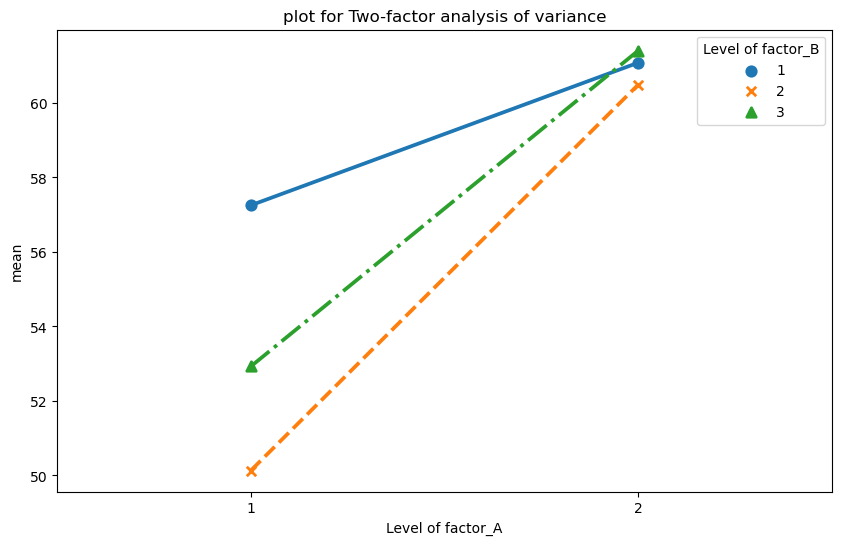

,sum_sq,df,F,PR(>F)
C(factor_A),428.479797,1.0,14.645923,0.000815
C(factor_B),74.369141,2.0,1.271011,0.298763
C(factor_A):C(factor_B),56.555325,2.0,0.966562,0.394709
Residual,702.141835,24.0,NaN,NaN


In [10]:
#データの概観
plt.figure(figsize=(10, 6))
sns.pointplot(x='factor_A', y='value_01', hue='factor_B', data=df, ci=None, markers=["o", "x", "^"], linestyles=["-", "--", "-."])
plt.title('plot for Two-factor analysis of variance')
plt.xlabel('Level of factor_A')
plt.ylabel('mean')
plt.legend(title='Level of factor_B')
plt.show()

# OLSモデルを用いた二要因分散分析
model = ols('value_01 ~ C(factor_A) * C(factor_B)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results

#定義式通りに計算

In [11]:
# 全体の平均平方和（MST） #
## 全体平均
overall_mean = df['value_01'].mean()

##全体の平均平方和
ss_total = sum((df['value_01'] - overall_mean)**2)
df_total = len(df) - 1

# 残差の平均平方 (MSE) の計算
## 残差の平方和 (SSE) の計算
sse = sum((df['value_01'] - df.groupby(['factor_A', 'factor_B'])['value_01'].transform('mean'))**2)

## 残差の自由度 (dfE) の計算
### N は全観測値の数、k はグループの数
n = len(df['value_01'])
k = a_levels * b_levels
dfE = n - k
mse = sse / dfE
print("Residual の平均平方和（MSE）は",f"{mse:.5} ")

# 要因 A の平均平方和（MSA）を計算 #

## 要因 A の全体平均
mean_A = df.groupby('factor_A')['value_01'].mean()

## factor_ A の平方和（SSA）
ssa = sum(df.groupby('factor_A').size() * (mean_A - overall_mean)**2)

## factor_ A の自由度（dfA）
dfa = a_levels - 1

## factor_ A の平均平方和（MSA）
msa = ssa / dfa
print("factor_A の平均平方和（MSA）は",f"{msa:.5} ")
print("factor_A のfは",f"{msa/mse:.5} ")

# 要因 B の平均平方和（MSA）を計算 #

## 要因 B の全体平均
mean_B = df.groupby('factor_B')['value_01'].mean()

## factor_ B の平方和（SSB）
ssb = sum(df.groupby('factor_B').size() * (mean_B - overall_mean)**2)

## factor_ B の自由度（dfB）
dfb = b_levels - 1

## factor_ B の平均平方和（MSB）
msb = ssb / dfb
print("factor_B の平均平方和（MSA）は",f"{msb:.5} ")
print("factor_B のfは",f"{msb/mse:.5} ")


# 交互作用の平均平方和（MSAB）を計算 #
# 交互作用の平方和 (SS交互作用) の計算
group_means = df.groupby(['factor_A', 'factor_B'])['value_01'].mean()
overall_mean = df['value_01'].mean()
ss_interaction = sum((group_means.loc[a, b] - group_means.loc[a, :].mean() - group_means.loc[:, b].mean() + overall_mean)**2 for a in range(1, a_levels + 1) for b in range(1, b_levels + 1)) * n_samples

# 交互作用の自由度 (df交互作用) の計算
df_interaction = (a_levels - 1) * (b_levels - 1)

# 交互作用の平均平方 (MS交互作用) の計算
ms_interaction = ss_interaction / df_interaction

# 交互作用効果の F値の計算
f_interaction = ms_interaction / mse

ss_interaction, df_interaction, ms_interaction, f_interaction

print("factor_AB の平均平方和（MSA）は",f"{ms_interaction:.5} ")
print("factor_AB のfは",f"{f_interaction:.5} ")

# 全体の平方和 (SS全体) の計算
ss_total = sum((df['value_01'] - overall_mean)**2)

# 要因 A、要因 B の平方和
ss_factor_A = anova_results['sum_sq']['C(factor_A)']
ss_factor_B = anova_results['sum_sq']['C(factor_B)']

# 分散説明率の計算
# 全体の平方和 (SS全体) の計算
ss_total = sum((df['value_01'] - overall_mean)**2)

# 要因 A、要因 B の平方和
ss_factor_A = anova_results['sum_sq']['C(factor_A)']
ss_factor_B = anova_results['sum_sq']['C(factor_B)']

# 分散説明率の計算
var_explained_A = ssa / ss_total
var_explained_B = ssb / ss_total
var_explained_interaction = ss_interaction / ss_total

var_explained_A, var_explained_B, var_explained_interaction


Residual の平均平方和（MSE）は 29.256 
factor_A の平均平方和（MSA）は 428.48 
factor_A のfは 14.646 
factor_B の平均平方和（MSA）は 37.185 
factor_B のfは 1.271 
factor_AB の平均平方和（MSA）は 28.278 
factor_AB のfは 0.96656 


(0.3396465633672761, 0.05895079189108968, 0.0448301691309118)